In [1]:
#Lets get all the libraries that we may need in this analysis.
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lets have a look what does our dataset look like?
Titanic=pd.read_csv("titanic-data.csv")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Questions:

### While having a cursory look at the variables in the table, a few questions that immediately come to mind are:

- What were the numbers of the survivors and non-survivors across gender; male and female passangers?
- How did the survival of the passengers vary across the social class?
- Did age of the passengers determine their survival rate to any extent?
- How did survival of elite, adult women compare with that of class 3, adult women?
- Were juvenilles across social classes and gender treated equally?
- Which group had the worst survival rate?
- Which group had the best survival rate?

In [3]:
# Lets find out the data type in each column
print type(Titanic)
Titanic.dtypes

<class 'pandas.core.frame.DataFrame'>


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Among the variables; PassengerId and Pclass must be strings not integer.

In [4]:
Titanic.PassengerId = Titanic.PassengerId.astype(str)
Titanic.Pclass = Titanic.Pclass.astype(str)
Titanic.dtypes

PassengerId     object
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
Titanic.describe()
# Except for Survived, which is a boolean variable, all other columns are numeric

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Lets have a look at the null-values in each column
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Out of the missing data here, I think we can't do anything about the missing data in 'Cabin' and 'Embarked' columns. Furthermore, it looks like, such data might not have much to do with the survival of the passengers, except for the case, when certain cabins are closer to the site of rescue operation on-board. Still, that might not have much relevance in the chaotic atmosphere, when everyone might be panic stricken to save life.

So, here we will concentrate on the missing data in the Age column and shall try to fix it.
- Out of 891 data points, we have 177 null values in the Age column,almost 20%.

In [7]:
Titanic[Titanic.Age==0].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


So no value in the Age column equal to zero, so we have to deal with null values only.

In [8]:
Titanic.Age.mode()

0    24.0
dtype: float64

### CAUTION!
As we are replacing the null values with the median age, and there are 177 null values, now the most common age will 
be the median age and number of people having the median age will be well above 177.
Therefore, the consequent distribution may impact the existing distribution and hence, mode, median and mean.
It must be kept in mind.

In [9]:
# Create a function that replaces the null values in the column 
# with median value for that column in that data group
# Eg...missing age value for a male in class2 will be replaced by the
# median age for the male in class2.

def Age_withoutNA(df):
    df['Age'] = np.where((df['Age'].isnull()), df['Age'].median(),df['Age'])
    return df


Titanic = Titanic.groupby(['Pclass','Sex']).apply(Age_withoutNA)

Titanic.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thus, we have successfully replaced the null values in the Age column by the median value for the group (consisting of a particular class and sex).

In [10]:
# Lets analyse the distribution of numeric data in the datset.
Titanic.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.112424,0.523008,0.381594,32.204208
std,0.486592,13.304424,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,21.500000,0.000000,0.000000,7.910400
50%,0.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


The table above says that overall 38.38% people survived, 75% of the people were equal to or younger than 36 years of age, however, we do have some outliers.
Other numeric variables have very large dispersion and these data do not make much sense.

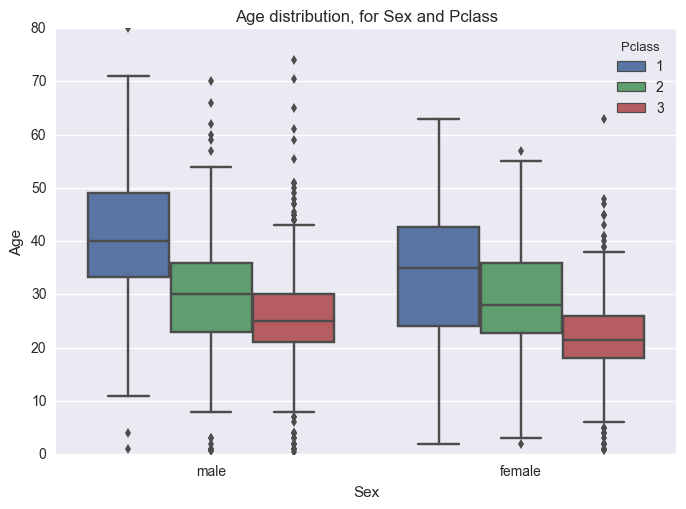

In [11]:
# Let's have a visual representation of outliers:

sns.boxplot(x="Sex", y="Age", hue="Pclass", data=Titanic)  
plt.title('Age distribution, for Sex and Pclass')

So it is very much evident that there are quite a few outliers on higher age bracket among males in the second and third class and females in the third class; while there quite a few very young male passangers in class 2 and class 3, quite a few very young female passengers in class 3.

In [12]:
# Lets, compare the ages of the people who survived and who did not.

Titanic.groupby('Survived').describe()['Age']

Survived       
0         count    549.000000
          mean      29.737705
          std       12.818264
          min        1.000000
          25%       22.000000
          50%       25.000000
          75%       37.000000
          max       74.000000
1         count    342.000000
          mean      28.108684
          std       14.010565
          min        0.420000
          25%       21.000000
          50%       27.000000
          75%       36.000000
          max       80.000000
Name: Age, dtype: float64

We can see that once we discount all the differences among the passengers and consider only their age, 
there is not much differnce between the group that survived and the group that didn't.

In [13]:
# Further on data wrangling, I think we miss a variable that divides the 
# the population into adults and minors.
# Insert a column, Adult; with boolean values:

# Adult_bool=[]
# for i in Titanic.Age:
#     if i >= 16:
#         Adult_bool.append(True)
#     else:
#         Adult_bool.append(False)
# is_Adult=pd.Series(Adult_bool)
# print is_Adult.head(10)

##Titanic['Adult']=is_Adult

# Instead of writing a for loop,we can simply do:

#Titanic.Age>=16.0 is a series of boolean values.

Titanic['Adult']=Titanic.Age>=16.0
Titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,False


In [14]:
Titanic.groupby('Survived').groups

{0: Int64Index([  0,   4,   5,   6,   7,  12,  13,  14,  16,  18,
             ...
             877, 878, 881, 882, 883, 884, 885, 886, 888, 890],
            dtype='int64', length=549),
 1: Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  17,  19,
             ...
             865, 866, 869, 871, 874, 875, 879, 880, 887, 889],
            dtype='int64', length=342)}

In [15]:
# Let the get the total no of passangers in each class
Titanic.groupby('Pclass').count()['PassengerId']

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [16]:
Titanic.groupby('Pclass').sum()
#First groups the data by Pclass and returns everything
#(columns) that can be summed...int/float/boolean

,Survived,Age,SibSp,Parch,Fare,Adult
Pclass,,,,,,
1,136,8266.42,90,77,18177.4125,210.0
2,87,5494.83,74,70,3801.8417,165.0
3,119,12177.92,302,193,6714.6951,433.0


In [17]:
# Now, lets find, how many of the passangers survived in each class
Titanic.groupby('Pclass').sum()['Survived'] 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [18]:
Titanic[Titanic.Age<=4].PassengerId.count()

40

In [19]:
Titanic[Titanic.Age<=4].Survived.sum()

27

That is painful! Only 67.5% of the toddlers who could barely speak were successfully rescued.

In [20]:
print Titanic.groupby('Sex').count()['Survived']
print "\n"
print Titanic.groupby('Sex').sum()['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64


Sex
female    233
male      109
Name: Survived, dtype: int64


Clearly, female passengers had better survival rate.

In [21]:
print Titanic.groupby(['Pclass','Sex']).count()['Survived']
print "\n"
print Titanic.groupby(['Pclass','Sex']).sum()['Survived']


Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64


Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64


In [22]:
Titanic.groupby(['Pclass','Sex','Adult']).count()['Survived']

Pclass  Sex     Adult
1       female  False      3
                True      91
        male    False      3
                True     119
2       female  False     10
                True      66
        male    False      9
                True      99
3       female  False     30
                True     114
        male    False     28
                True     319
Name: Survived, dtype: int64

In [23]:
Titanic.groupby(['Pclass','Sex','Adult']).sum()['Survived']

Pclass  Sex     Adult
1       female  False     2
                True     89
        male    False     3
                True     42
2       female  False    10
                True     60
        male    False     9
                True      8
3       female  False    16
                True     56
        male    False     9
                True     38
Name: Survived, dtype: int64

# Conclusion:
Before making any conclusion, we must bear in mind that we have large number of missing values in the column and if we had those missing values, we would be able to make more confident conclusions about the relationship between survival rate and age distribution. So, we could have ignored the missing values. But, we replaced them with median age for the group concerned, based on passanger's class and gender. However, we may end up making some gross generalizations. For example, we may end up with the median age for the group being the most common age in that group and that could be erroneous. Furthermore, we may end up pushing the mean age for the group upward.

So after putting the passengers in various buckets, we get some key insight in the data:

1. 2nd and 3rd class, male passengers have the worst survival rate.
2. Among females, those in 1st and 2nd class have relatively higher survival rate than those in the 3rd class.
3. Further, Minors, male or female in the 1st and 2nd class are more likely to have survived than adults. Also, among minors, females have higher survival rate.
4. Male minors in the 3rd class are the worst affected.

# Visualizations:

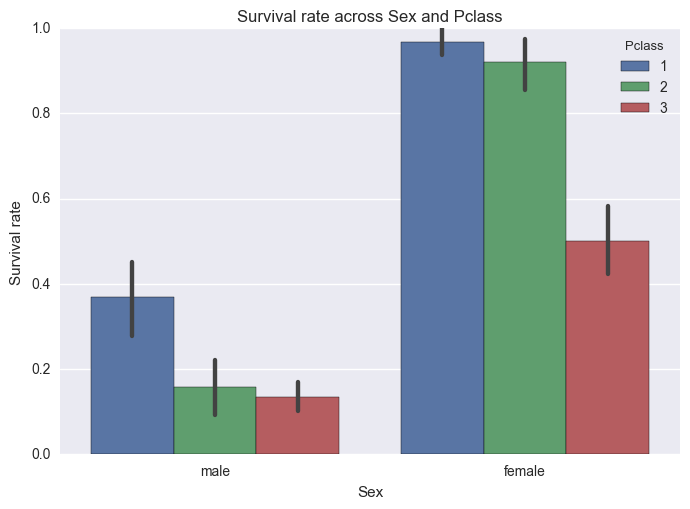

In [30]:
# Let us try to compare the survival rate among male and female
# and how does it vary across the passanger class:

sns.barplot(x="Sex", y="Survived", hue="Pclass", data=Titanic)  
plt.title('Survival rate across Sex and Pclass')
plt.ylabel('Survival rate')

- Clearly females in class 1 and 2 have almost twice the survival rate than those in class 3.
- Further males in class 2 and 3 are almost equally vulnerable and more than twice the males in class1. 

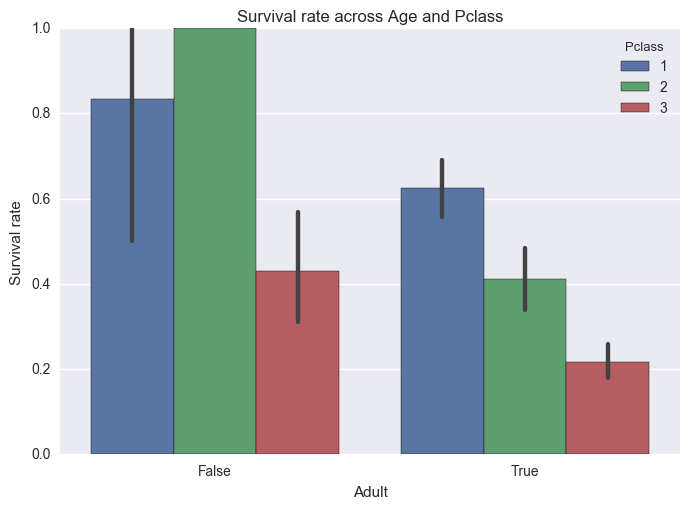

In [31]:
# Next, lets see how does survival rate for adults and minors compare
# with each other and how does it various across the classes

sns.barplot(x="Adult", y="Survived", hue="Pclass", data=Titanic)  
plt.title('Survival rate across Age and Pclass')
plt.ylabel('Survival rate')

#### When we talk about age, we must factor in the fact that we have replaced the missing values by median age for the group concerned (sex and class). So, we may run the risk of distorting our age distribution and hence, the mean, mode and median age.
- Adults from a relatively higher class appear to have a higher chance of survival.
- However, surprisingly, minors in class 2 appear to have the highest survival rate.
This is interesting! Was it because, it was easier to rescue them, may be proximity to the rescue area. I don't know, may be plausible. However, the corelation might be only co-incidental and in no way explains the causation.

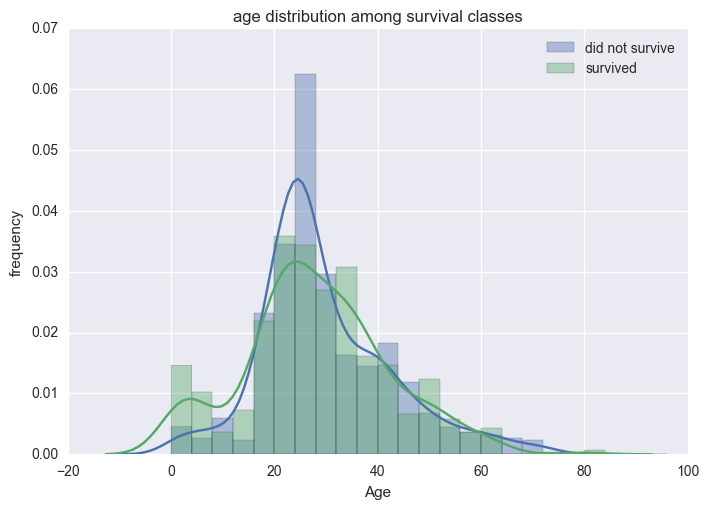

In [26]:
age_bins = np.arange(0, 100, 4)
sns.distplot(Titanic.loc[(Titanic['Survived']==0),'Age'], bins=age_bins)
sns.distplot(Titanic.loc[(Titanic['Survived']==1),'Age'], bins=age_bins)
plt.title('age distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

- Survival was highest among the minors in proportion to their numbers. However, the minors in the age group 8-12 were worst hit, may be because, they were not young enough to be clutched in hands or not strong enough to fend for themselves like those in the 12-16 age group. 
- Highest casuality was reported for the people who were between 16 to 32 years of age relative to their numbers. But, again we must bear in mind that we have replaced the unknown age values by the median age values that may influence our conclusion.

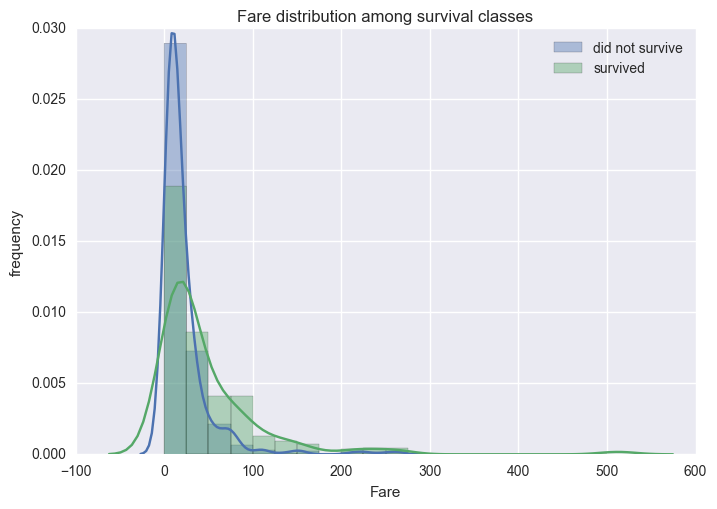

In [27]:
# Finally, let'e have a look at the fare passengers paid and their likelihood of survival.

fare_bins = np.arange(0, 520, 25)
sns.distplot(Titanic.loc[Titanic['Survived']==0 ,'Fare'], bins=fare_bins)
sns.distplot(Titanic.loc[Titanic['Survived']==1 ,'Fare'], bins=fare_bins)
plt.title('Fare distribution among survival classes')
plt.ylabel('frequency')
plt.legend(['did not survive', 'survived']);

So, we can see that money spent for the ticket relates to a higher survival rate. Folks who bought the ticket at higher price, appear to have better chance to survival. However, it doesn't explain the causation and we cannot conclude that money power led them exercise undue influence.